# Exploring Dandiset 001354: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation

> **DISCLAIMER**: This notebook was AI-generated and has not been fully verified. Please be cautious when interpreting the code or results. Always validate findings with additional research and analysis.

## Overview

This notebook explores Dandiset 001354, which contains single cell electrophysiological recordings from mouse hippocampal CA1 neurons. These recordings capture neuronal responses to the activation of programmable antigen-gated G-protein-coupled engineered receptors (PAGERs).

According to the dataset description, recorded neurons were transfected with AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP, and responses were recorded after the application of either DCZ (100 nM) or DCZ + soluble mCherry (1 uM).

The dataset is available at: [https://dandiarchive.org/dandiset/001354/0.250312.0036](https://dandiarchive.org/dandiset/001354/0.250312.0036)

## Required Packages

The following packages are needed for this analysis:

In [1]:
# Import required packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from itertools import islice
import h5py
import remfile
import pynwb
from dandi.dandiapi import DandiAPIClient

# Set seaborn theme for plots, avoiding deprecated style setting
sns.set_theme()

## Loading the Dandiset

We'll first connect to the DANDI archive and load basic information about the Dandiset:

In [2]:
# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001354", "0.250312.0036")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")
print(f"Access requirements: {metadata['access'][0]['status']}")
print(f"License: {metadata['license'][0]}")
# Handle contributor field which might contain dictionaries
contributors = []
for contributor in metadata['contributor']:
    if isinstance(contributor, dict) and 'name' in contributor:
        contributors.append(contributor['name'])
    elif isinstance(contributor, str):
        contributors.append(contributor)
    else:
        contributors.append(str(contributor))

print(f"Contributors: {', '.join(contributors)}")
print(f"\nKeywords: {', '.join(metadata['keywords'])}")

Dandiset name: Hippocampal neuronal responses to programmable antigen-gated G-protein-coupled engineered receptor activation
Dandiset URL: https://dandiarchive.org/dandiset/001354/0.250312.0036
Access requirements: dandi:OpenAccess
License: spdx:CC-BY-4.0
Contributors: Klein, Peter, National Institute of Mental Health, Phil and Penny Knight Initiative for Brain Resilience, National Cancer Institute

Keywords: CA1, PAGER, Chemogenetics, Antigen-gated


### Description

The detailed description of this Dandiset:

In [3]:
print(metadata['description'])

This dataset contains single cell electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors. Recorded neurons were transfected with an AAV1/2-hSyn-a-mCherry-PAGER-Gi-P2A-mEGFP and responses were then recorded in response to DCZ (100 nM) or DCZ + soluble mCherry (1 uM) application.

The authors are grateful to the St Jude Children’s Research Hospital Collaborative Research Consortium on GPCRs, the Chan Zuckerberg Biohub–San Francisco, Phil and Penny Knight Initiative for Brain Resilience (KIG-104), Stanford Cancer Institute, Wu Tsai Neurosciences Institute of Stanford University and the NIH (MH135934 to A.Y.T. and I.S., F32CA257159 to N.A.K., NS121106 to I.S.) for funding this work. R.T. was supported by the Life Sciences Research Foundation Fellowship (sponsored by Astellas Pharma) and JSPS Overseas Research Fellowship.


## Listing Assets in the Dandiset

Let's list some of the NWB files available in this Dandiset:

In [4]:
# List some assets in the Dandiset
assets = dandiset.get_assets()
print("\nFirst 5 assets:")
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier}, Size: {asset.size} bytes)")


First 5 assets:
- sub-PK-109/sub-PK-109_ses-20240717T180719_slice-2024-07-17-0009_cell-2024-07-17-0009_icephys.nwb (ID: b2860f39-ba08-4b5f-8e12-c4b51ad6ccba, Size: 40296384 bytes)
- sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb (ID: 8609ffee-a79e-498c-8dfa-da46cffef135, Size: 41242076 bytes)
- sub-PK-109/sub-PK-109_ses-20240717T184616_slice-2024-07-17-0011_cell-2024-07-17-0011_icephys.nwb (ID: c1a42ce7-eca1-481c-9bed-1fc055ba1aef, Size: 38369705 bytes)
- sub-PK-109/sub-PK-109_ses-20240717T164239_slice-2024-07-17-0005_cell-2024-07-17-0005_icephys.nwb (ID: a93f7c5b-a804-4165-aec5-c3571f0611f2, Size: 44188247 bytes)
- sub-PK-109/sub-PK-109_ses-20240717T155714_slice-2024-07-17-0003_cell-2024-07-17-0003_icephys.nwb (ID: 58c534de-2a38-4a5b-986c-2dc4c3067b97, Size: 39808903 bytes)


## Loading an NWB File

For our analysis, we'll focus on a specific NWB file from this Dandiset. We'll load the file using PyNWB and explore its content.

We'll be examining the file: `sub-PK-109/sub-PK-109_ses-20240717T150830_slice-2024-07-17-0001_cell-2024-07-17-0001_icephys.nwb`

In [5]:
# Load the NWB file using PyNWB
url = "https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Print basic information about the NWB file
print(f"NWB file identifier: {nwb.identifier}")
print(f"Session description: {nwb.session_description}")
print(f"Session start time: {nwb.session_start_time}")
print(f"Lab: {nwb.lab}")
print(f"Institution: {nwb.institution}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


NWB file identifier: pk2024_07_17_0001
Session description: Intracellular electrophysiology experiment.
Session start time: 2024-07-17 15:08:30-07:00
Lab: _
Institution: _


### Subject Information

Let's look at the subject information contained in this NWB file:

In [6]:
# Print subject information
subject = nwb.subject
print(f"Subject ID: {subject.subject_id}")
print(f"Species: {subject.species}")
print(f"Sex: {subject.sex}")
print(f"Date of birth: {subject.date_of_birth}")
print(f"Age reference: {subject.age__reference}")

Subject ID: PK-109
Species: Mus musculus
Sex: F
Date of birth: 2024-04-07 00:00:00-07:00
Age reference: birth


## NWB File Structure

The NWB file contains electrophysiological recordings from CA1 neurons. Let's examine the structure of the file in more detail.

### Electrodes & Devices

In [7]:
# Print information about electrodes and devices
print("Electrodes:")
for electrode_id, electrode in nwb.icephys_electrodes.items():
    print(f"  - {electrode_id}")
    print(f"    Description: {electrode.description}")
    print(f"    Device: {electrode.device}")

Electrodes:
  - electrode-0
    Description: no description
    Device: DeviceIcephys pynwb.device.Device at 0x134915184313024
Fields:
  description: no description

  - electrode-1
    Description: no description
    Device: DeviceIcephys pynwb.device.Device at 0x134915184313024
Fields:
  description: no description



### Lab Metadata

This NWB file also includes some lab-specific metadata:

In [8]:
# Extract lab metadata
lab_meta = nwb.lab_meta_data.get('DandiIcephysMetadata')
print(f"Cell ID: {lab_meta.cell_id}")
print(f"Slice ID: {lab_meta.slice_id}")
print(f"Targeted layer: {lab_meta.targeted_layer}")
print(f"Inferred layer: {lab_meta.inferred_layer or 'Not specified'}")

Cell ID: 2024_07_17_0001
Slice ID: 2024_07_17_0001
Targeted layer: CA1
Inferred layer: Not specified


### Data Structure

The NWB file is organized in a hierarchical structure. Here are the main components of the data:

- **Acquisition**: Contains current clamp response data
- **Stimulus**: Contains stimulus data
- **Intracellular Recordings**: Table linking stimuli and responses
- **ICEphys Simultaneous Recordings**: Table grouping related recordings
- **ICEphys Sequential Recordings**: Table grouping simultaneous recordings

Let's examine the acquisition and stimulus data more closely:

In [9]:
# Count the number of acquisition items
print(f"Number of acquisition items: {len(nwb.acquisition)}")
print(f"Number of stimulus items: {len(nwb.stimulus)}")

# Look at the first few acquisition items
print("\nSample acquisition items:")
for i, (name, series) in enumerate(islice(nwb.acquisition.items(), 3)):
    print(f"  - {name}")
    print(f"    Type: {type(series).__name__}")
    print(f"    Description: {series.description}")
    print(f"    Starting time: {series.starting_time} {series.starting_time_unit}")
    print(f"    Data shape: {series.data.shape}")
    print(f"    Rate: {series.rate} Hz")
    print(f"    Unit: {series.unit}")

# Look at the first few stimulus items
print("\nSample stimulus items:")
for i, (name, series) in enumerate(islice(nwb.stimulus.items(), 3)):
    print(f"  - {name}")
    print(f"    Type: {type(series).__name__}")
    print(f"    Description: {series.description}")
    print(f"    Starting time: {series.starting_time} {series.starting_time_unit}")
    print(f"    Data shape: {series.data.shape}")
    print(f"    Rate: {series.rate} Hz")
    print(f"    Unit: {series.unit}")

Number of acquisition items: 624
Number of stimulus items: 624

Sample acquisition items:
  - current_clamp-response-01-ch-0
    Type: CurrentClampSeries
    Description: Response to: ramp
    Starting time: 0.0 seconds
    Data shape: (100000,)
    Rate: 20000.0 Hz
    Unit: volts
  - current_clamp-response-01-ch-1
    Type: CurrentClampSeries
    Description: Response to: ramp
    Starting time: 0.0 seconds
    Data shape: (100000,)
    Rate: 20000.0 Hz
    Unit: volts
  - current_clamp-response-02-ch-0
    Type: CurrentClampSeries
    Description: Response to: ramp
    Starting time: 5.0 seconds
    Data shape: (100000,)
    Rate: 20000.0 Hz
    Unit: volts

Sample stimulus items:
  - stimulus-01-ch-0
    Type: CurrentClampStimulusSeries
    Description: Stim type: ramp
    Starting time: 0.0 seconds
    Data shape: (100000,)
    Rate: 20000.0 Hz
    Unit: amperes
  - stimulus-01-ch-1
    Type: CurrentClampStimulusSeries
    Description: Stim type: ramp
    Starting time: 0.0 second

## Visualizing Data

Now let's visualize some of the data from the NWB file. We'll start by looking at the responses and stimuli for one of the recordings.

In [10]:
# Define a function to load and visualize a subset of the data
def visualize_recording(response_name, stimulus_name, sample_size=10000):
    """
    Visualize a recording by plotting the response and stimulus data.
    
    Parameters:
    -----------
    response_name : str
        Name of the response series in nwb.acquisition
    stimulus_name : str
        Name of the stimulus series in nwb.stimulus
    sample_size : int
        Number of data points to plot (default: 10000)
    """
    # Load response data
    response_series = nwb.acquisition[response_name]
    response_data = response_series.data[:sample_size] * response_series.conversion
    response_time = np.arange(len(response_data)) / response_series.rate + response_series.starting_time
    
    # Load stimulus data
    stimulus_series = nwb.stimulus[stimulus_name]
    stimulus_data = stimulus_series.data[:sample_size] * stimulus_series.conversion
    stimulus_time = np.arange(len(stimulus_data)) / stimulus_series.rate + stimulus_series.starting_time
    
    # Create the figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
    
    # Plot response data
    ax1.plot(response_time, response_data, color='blue')
    ax1.set_ylabel(f'Membrane Potential ({response_series.unit})')
    ax1.set_title(f'Response: {response_name}')
    ax1.grid(True)
    
    # Plot stimulus data
    ax2.plot(stimulus_time, stimulus_data * 1e12, color='red')  # Convert to pA for better visibility
    ax2.set_ylabel('Current (pA)')
    ax2.set_xlabel('Time (s)')
    ax2.set_title(f'Stimulus: {stimulus_name}')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print additional information
    print(f"Response description: {response_series.description}")
    print(f"Stimulus description: {stimulus_series.description}")
    print(f"Recording duration: {sample_size/response_series.rate:.2f} seconds (showing first {sample_size} samples)")
    print(f"Sampling rate: {response_series.rate} Hz")

### Visualizing a Single Recording

Let's visualize the first recording in the dataset:

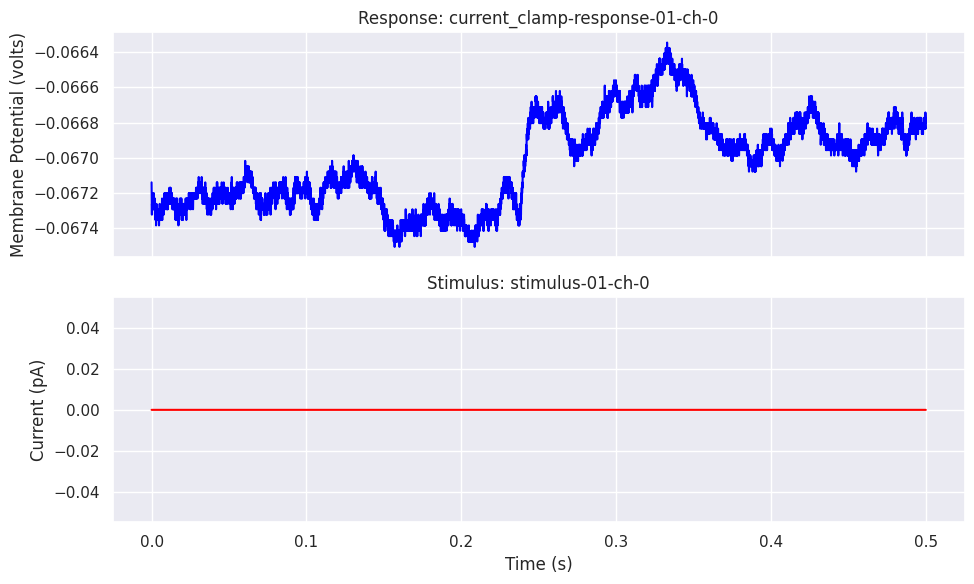

Response description: Response to: ramp
Stimulus description: Stim type: ramp
Recording duration: 0.50 seconds (showing first 10000 samples)
Sampling rate: 20000.0 Hz


In [11]:
# Visualize the first recording
visualize_recording('current_clamp-response-01-ch-0', 'stimulus-01-ch-0')

### Comparing Multiple Recordings

Now let's compare multiple recordings to see how the responses change:

In [12]:
# Define a function to compare multiple recordings
def compare_recordings(recording_numbers, channel=0, sample_size=5000):
    """
    Compare multiple recordings by plotting their responses.
    
    Parameters:
    -----------
    recording_numbers : list
        List of recording numbers to compare
    channel : int
        Channel number (0 or 1)
    sample_size : int
        Number of data points to plot (default: 5000)
    """
    plt.figure(figsize=(12, 8))
    
    for rec_num in recording_numbers:
        # Format the recording number with leading zeros if needed
        rec_str = f"{rec_num:02d}" if rec_num < 100 else f"{rec_num}"
        
        # Get the response name
        response_name = f"current_clamp-response-{rec_str}-ch-{channel}"
        
        if response_name in nwb.acquisition:
            # Load response data
            response_series = nwb.acquisition[response_name]
            response_data = response_series.data[:sample_size] * response_series.conversion
            response_time = np.arange(len(response_data)) / response_series.rate + response_series.starting_time
            
            # Plot the response data
            plt.plot(response_time, response_data, label=f"Recording {rec_num}")
    
    plt.xlabel('Time (s)')
    plt.ylabel(f'Membrane Potential (V)')
    plt.title(f'Comparison of Multiple Recordings (Channel {channel})')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

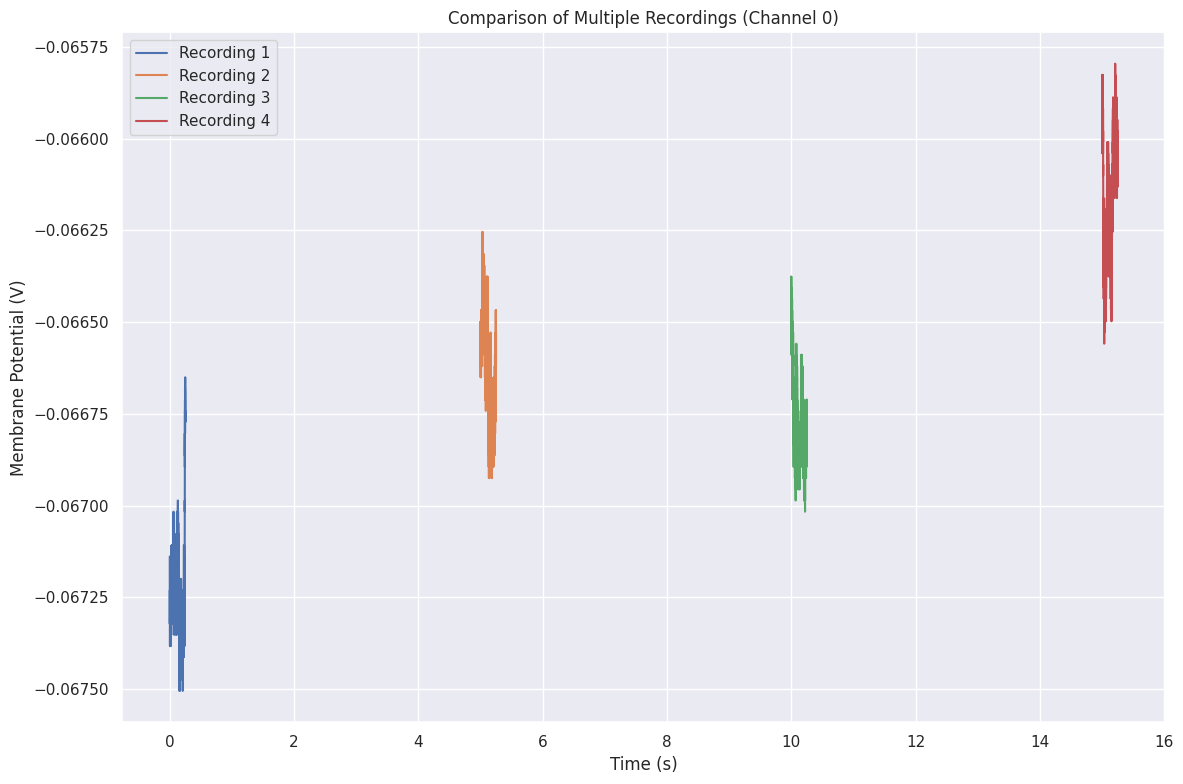

In [13]:
# Compare four sequential recordings
compare_recordings([1, 2, 3, 4])

### Examining Ramp-Type Stimuli and Responses

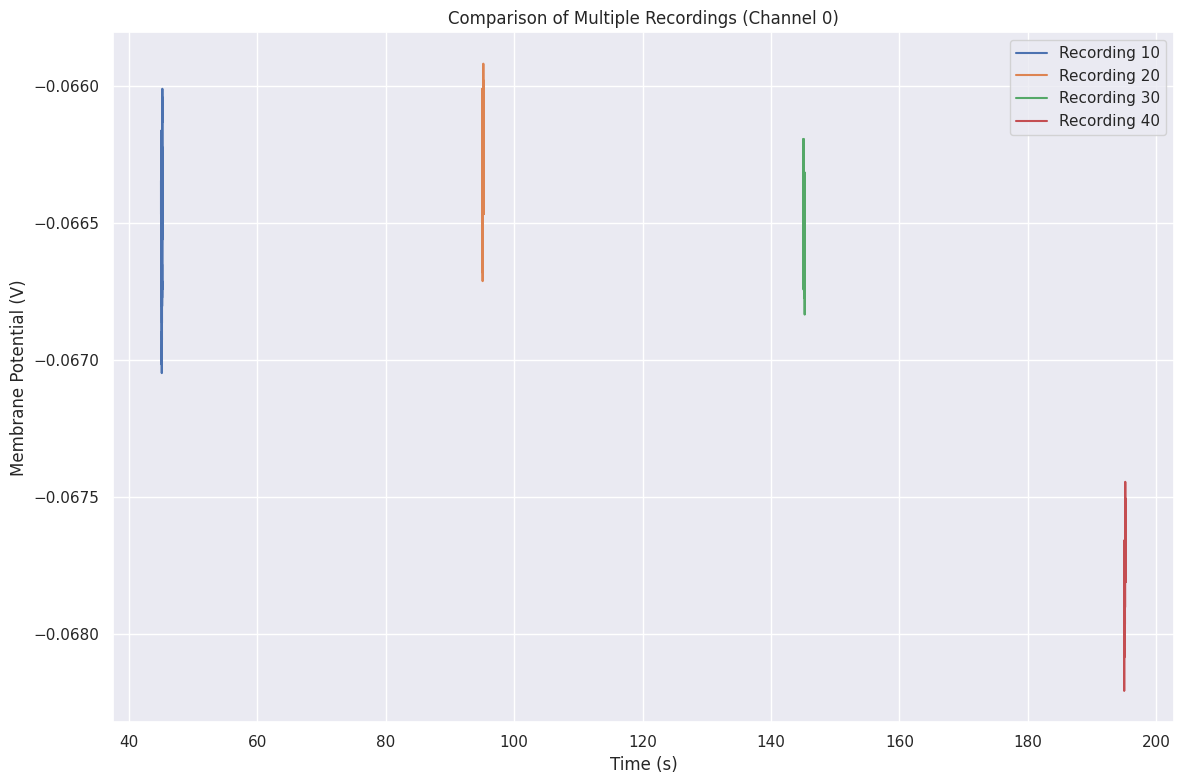

In [14]:
# Let's look at a different set of recordings
compare_recordings([10, 20, 30, 40])

### Visualizing Average Response

Now let's calculate and visualize the average response across multiple recordings:

In [15]:
def calculate_average_response(recording_numbers, channel=0, sample_size=5000):
    """
    Calculate the average response across multiple recordings.
    
    Parameters:
    -----------
    recording_numbers : list
        List of recording numbers to average
    channel : int
        Channel number (0 or 1)
    sample_size : int
        Number of data points to use (default: 5000)
    
    Returns:
    --------
    avg_time : ndarray
        Time points for the average response
    avg_response : ndarray
        Average response data
    std_response : ndarray
        Standard deviation of the response data
    """
    all_responses = []
    
    for rec_num in recording_numbers:
        # Format the recording number with leading zeros if needed
        rec_str = f"{rec_num:02d}" if rec_num < 100 else f"{rec_num}"
        
        # Get the response name
        response_name = f"current_clamp-response-{rec_str}-ch-{channel}"
        
        if response_name in nwb.acquisition:
            # Load response data
            response_series = nwb.acquisition[response_name]
            response_data = response_series.data[:sample_size] * response_series.conversion
            all_responses.append(response_data)
    
    # Stack all responses and calculate statistics
    responses_array = np.vstack(all_responses)
    avg_response = np.mean(responses_array, axis=0)
    std_response = np.std(responses_array, axis=0)
    
    # Generate time points
    response_series = nwb.acquisition[f"current_clamp-response-{recording_numbers[0]:02d}-ch-{channel}"]
    avg_time = np.arange(len(avg_response)) / response_series.rate + response_series.starting_time
    
    return avg_time, avg_response, std_response

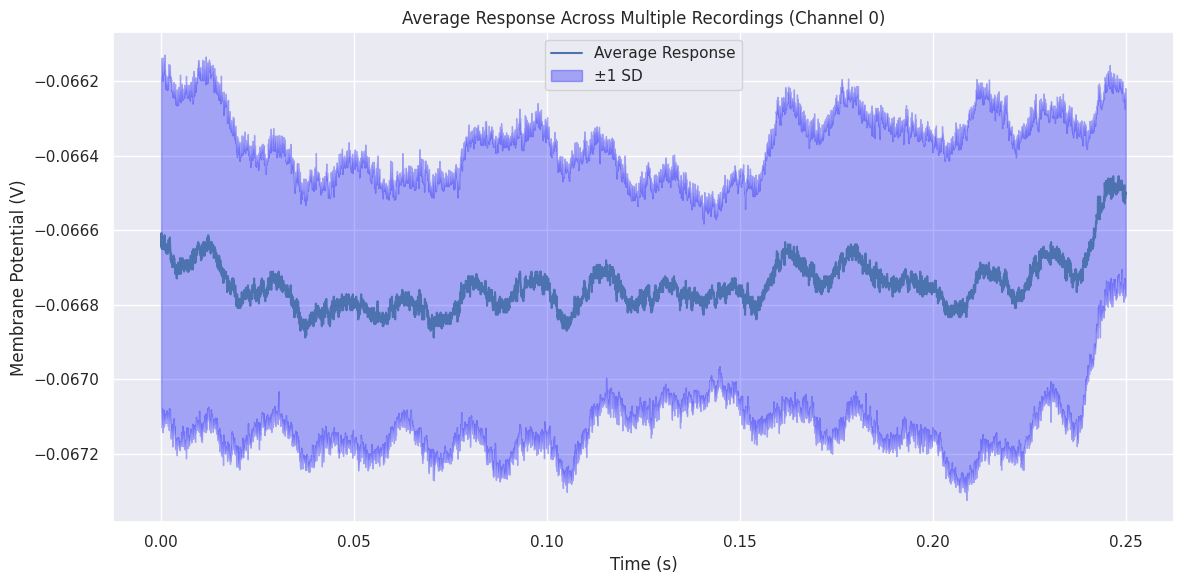

In [16]:
# Calculate average response for recordings 1-5
avg_time, avg_response, std_response = calculate_average_response([1, 2, 3, 4, 5])

# Plot average response with standard deviation
plt.figure(figsize=(12, 6))
plt.plot(avg_time, avg_response, 'b-', label='Average Response')
plt.fill_between(avg_time, avg_response-std_response, avg_response+std_response, 
                 alpha=0.3, color='blue', label='±1 SD')
plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (V)')
plt.title('Average Response Across Multiple Recordings (Channel 0)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Examining Stimulus Patterns

In [17]:
# Let's examine the stimulus patterns
def compare_stimuli(stimulus_numbers, channel=0, sample_size=5000):
    """
    Compare multiple stimuli.
    
    Parameters:
    -----------
    stimulus_numbers : list
        List of stimulus numbers to compare
    channel : int
        Channel number (0 or 1)
    sample_size : int
        Number of data points to plot (default: 5000)
    """
    plt.figure(figsize=(12, 6))
    
    for stim_num in stimulus_numbers:
        # Format the stimulus number with leading zeros if needed
        stim_str = f"{stim_num:02d}" if stim_num < 100 else f"{stim_num}"
        
        # Get the stimulus name
        stimulus_name = f"stimulus-{stim_str}-ch-{channel}"
        
        if stimulus_name in nwb.stimulus:
            # Load stimulus data
            stimulus_series = nwb.stimulus[stimulus_name]
            stimulus_data = stimulus_series.data[:sample_size] * stimulus_series.conversion
            stimulus_time = np.arange(len(stimulus_data)) / stimulus_series.rate + stimulus_series.starting_time
            
            # Convert to pA for better visibility
            plt.plot(stimulus_time, stimulus_data * 1e12, label=f"Stimulus {stim_num}")
    
    plt.xlabel('Time (s)')
    plt.ylabel('Current (pA)')
    plt.title(f'Comparison of Stimuli (Channel {channel})')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

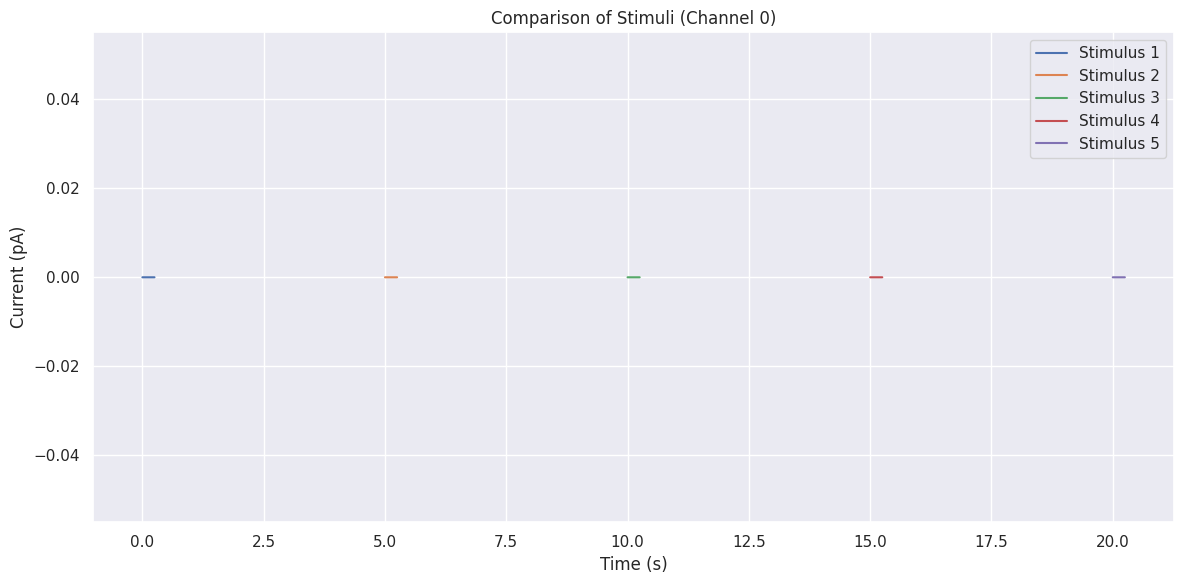

In [18]:
# Compare the stimuli for recordings 1-5
compare_stimuli([1, 2, 3, 4, 5])

## Analyzing Response Properties

Now let's analyze some properties of the neuronal responses like peak amplitude and time to peak:

In [19]:
def analyze_response_properties(recording_numbers, channel=0):
    """
    Analyze properties of neuronal responses.
    
    Parameters:
    -----------
    recording_numbers : list
        List of recording numbers to analyze
    channel : int
        Channel number (0 or 1)
    
    Returns:
    --------
    properties_df : pandas.DataFrame
        DataFrame containing the analyzed properties
    """
    properties = []
    
    for rec_num in recording_numbers:
        # Format the recording number with leading zeros if needed
        rec_str = f"{rec_num:02d}" if rec_num < 100 else f"{rec_num}"
        
        # Get the response name
        response_name = f"current_clamp-response-{rec_str}-ch-{channel}"
        
        if response_name in nwb.acquisition:
            # Load response data
            response_series = nwb.acquisition[response_name]
            response_data = response_series.data[:] * response_series.conversion
            
            # Calculate response properties
            baseline = np.mean(response_data[:1000])  # First 1000 points as baseline
            peak_amp = np.max(response_data[1000:]) - baseline
            peak_idx = np.argmax(response_data[1000:]) + 1000
            time_to_peak = peak_idx / response_series.rate
            
            # Store properties
            properties.append({
                'Recording': rec_num,
                'Baseline (V)': baseline,
                'Peak Amplitude (V)': peak_amp,
                'Time to Peak (s)': time_to_peak
            })
    
    # Create DataFrame
    properties_df = pd.DataFrame(properties)
    
    return properties_df

In [20]:
# Analyze properties for recordings 1-10
response_props = analyze_response_properties(range(1, 11))
print(response_props)

   Recording  Baseline (V)  Peak Amplitude (V)  Time to Peak (s)
0          1     -0.067246            0.082932           1.69870
1          2     -0.066483            0.081162           1.70270
2          3     -0.066635            0.083816           1.69710
3          4     -0.066220            0.083493           1.70045
4          5     -0.067165            0.081142           1.71760
5          6     -0.066781            0.084115           1.69710
6          7     -0.066593            0.085453           1.69685
7          8     -0.066853            0.085438           1.70365
8          9     -0.066785            0.083723           1.70145
9         10     -0.066346            0.082490           1.70560


Let's visualize these response properties:

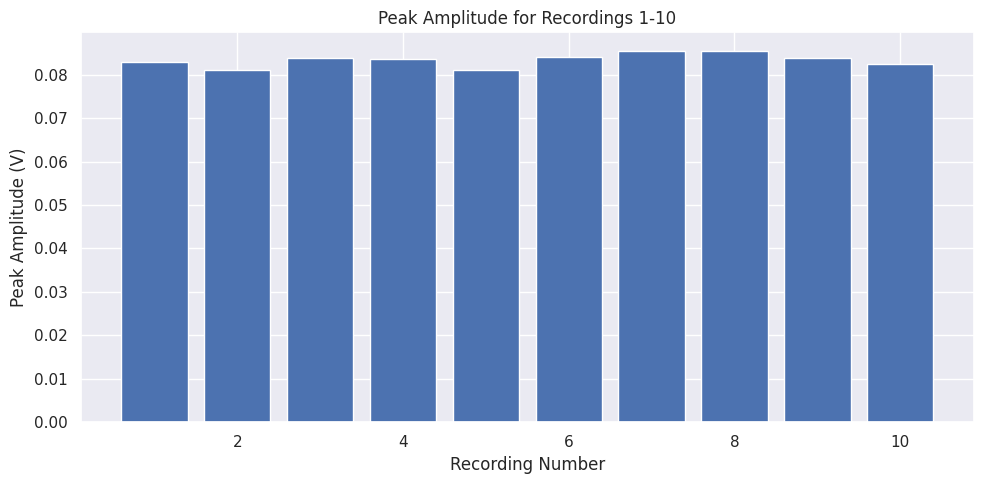

In [21]:
# Plot the peak amplitudes
plt.figure(figsize=(10, 5))
plt.bar(response_props['Recording'], response_props['Peak Amplitude (V)'])
plt.xlabel('Recording Number')
plt.ylabel('Peak Amplitude (V)')
plt.title('Peak Amplitude for Recordings 1-10')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

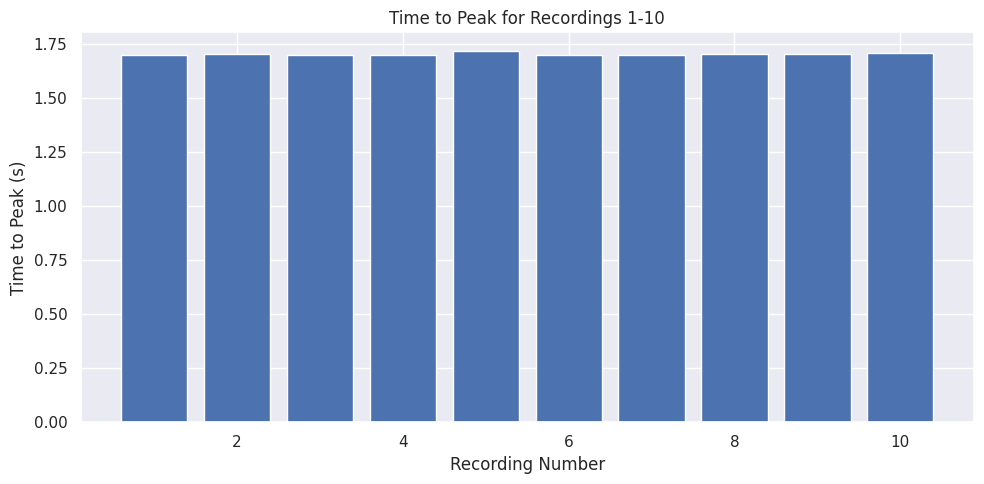

In [22]:
# Plot the time to peak
plt.figure(figsize=(10, 5))
plt.bar(response_props['Recording'], response_props['Time to Peak (s)'])
plt.xlabel('Recording Number')
plt.ylabel('Time to Peak (s)')
plt.title('Time to Peak for Recordings 1-10')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

## Combined Stimulus-Response Analysis

Finally, let's create a more comprehensive visualization that shows both stimulus and response data together for a single recording, allowing us to better understand the stimulus-response relationship:

In [23]:
def visualize_stimulus_response_relationship(recording_number, channel=0, sample_size=10000):
    """
    Create a comprehensive visualization of stimulus and response for one recording.
    
    Parameters:
    -----------
    recording_number : int
        Recording number to visualize
    channel : int
        Channel number (0 or 1)
    sample_size : int
        Number of data points to plot (default: 10000)
    """
    # Format the recording number
    rec_str = f"{recording_number:02d}" if recording_number < 100 else f"{recording_number}"
    
    # Get the response and stimulus names
    response_name = f"current_clamp-response-{rec_str}-ch-{channel}"
    stimulus_name = f"stimulus-{rec_str}-ch-{channel}"
    
    if response_name in nwb.acquisition and stimulus_name in nwb.stimulus:
        # Load response data
        response_series = nwb.acquisition[response_name]
        response_data = response_series.data[:sample_size] * response_series.conversion
        response_time = np.arange(len(response_data)) / response_series.rate + response_series.starting_time
        
        # Load stimulus data
        stimulus_series = nwb.stimulus[stimulus_name]
        stimulus_data = stimulus_series.data[:sample_size] * stimulus_series.conversion
        stimulus_time = np.arange(len(stimulus_data)) / stimulus_series.rate + stimulus_series.starting_time
        
        # Create the figure with two y-axes
        fig, ax1 = plt.subplots(figsize=(12, 6))
        
        # Plot response data
        ax1.set_xlabel('Time (s)')
        ax1.set_ylabel('Membrane Potential (V)', color='blue')
        ax1.plot(response_time, response_data, color='blue', label='Response')
        ax1.tick_params(axis='y', labelcolor='blue')
        ax1.grid(True)
        
        # Create second y-axis for stimulus
        ax2 = ax1.twinx()
        ax2.set_ylabel('Current (pA)', color='red')
        ax2.plot(stimulus_time, stimulus_data * 1e12, color='red', label='Stimulus')
        ax2.tick_params(axis='y', labelcolor='red')
        
        # Add title and legend
        plt.title(f'Stimulus-Response Relationship for Recording {recording_number}, Channel {channel}')
        
        # Add legend
        lines1, labels1 = ax1.get_legend_handles_labels()
        lines2, labels2 = ax2.get_legend_handles_labels()
        ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
        
        plt.tight_layout()
        plt.show()
        
        # Print additional information
        print(f"Response description: {response_series.description}")
        print(f"Stimulus description: {stimulus_series.description}")
        print(f"Recording duration: {sample_size/response_series.rate:.2f} seconds")
        print(f"Sampling rate: {response_series.rate} Hz")

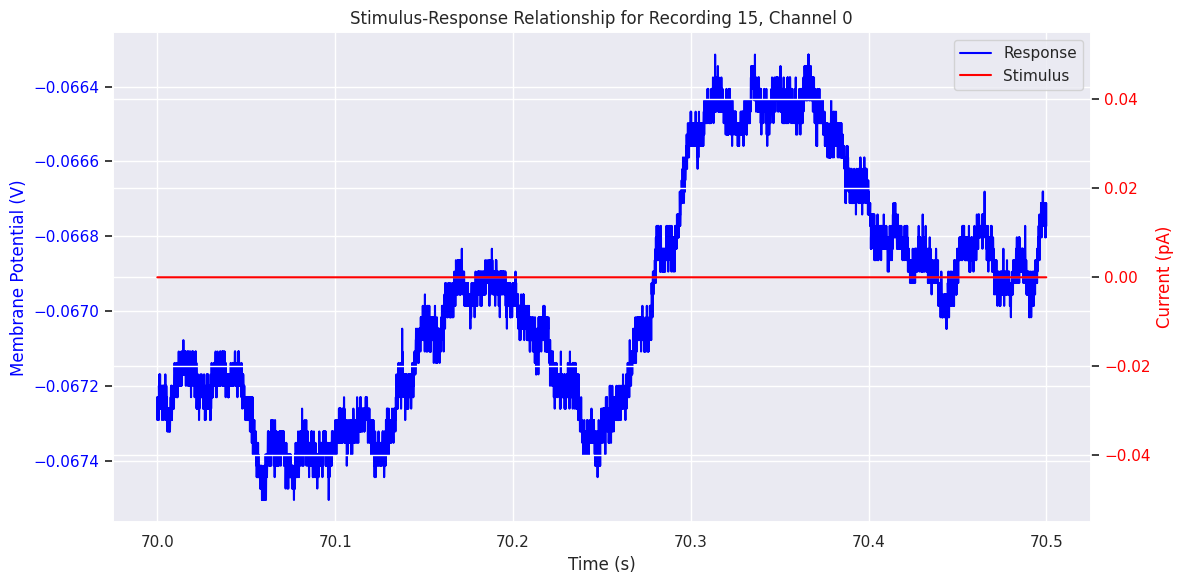

Response description: Response to: ramp
Stimulus description: Stim type: ramp
Recording duration: 0.50 seconds
Sampling rate: 20000.0 Hz


In [24]:
# Visualize the stimulus-response relationship for recording 15
visualize_stimulus_response_relationship(15)

## Examining Response to Different Treatment Conditions

The dataset description mentions that responses were recorded after application of either DCZ (100 nM) or DCZ + soluble mCherry (1 uM). While we don't have explicit labels in the dataset for these conditions, we can compare responses from different recordings to look for patterns that might correspond to these different treatments.

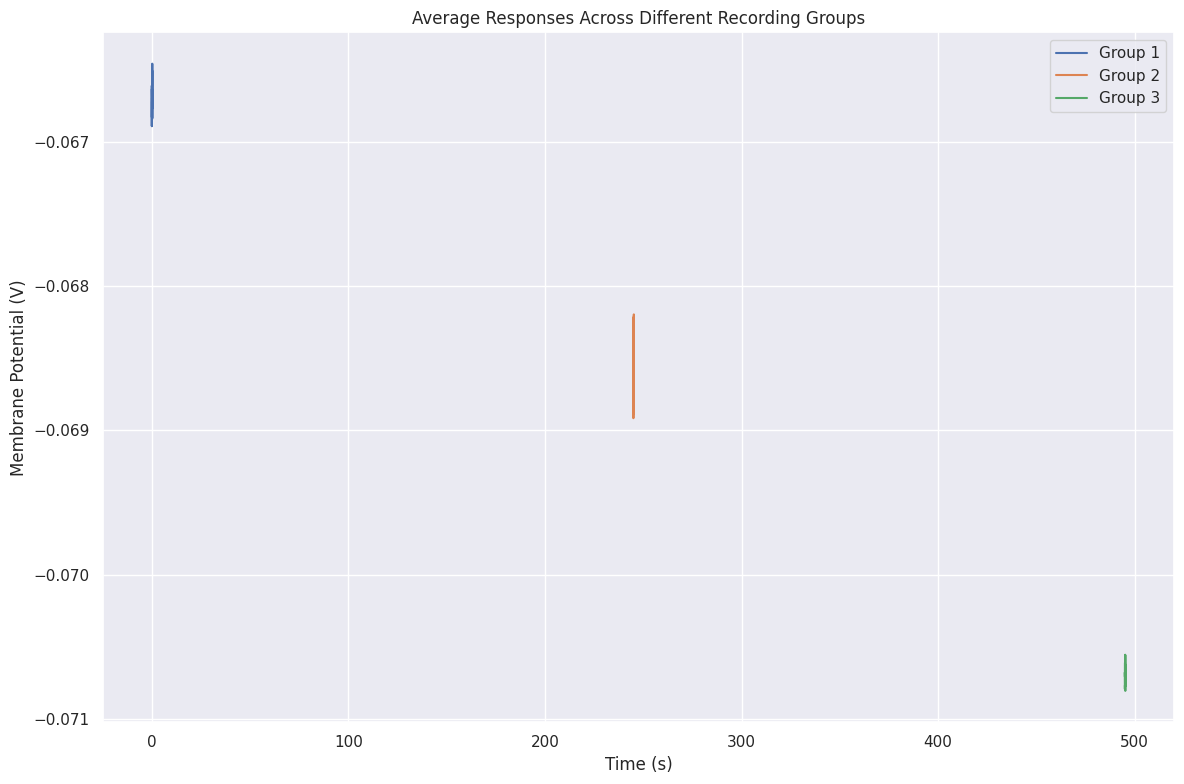

In [25]:
# Compare groups of recordings that might represent different treatment conditions
groups = {
    "Group 1": [1, 2, 3, 4, 5],
    "Group 2": [50, 51, 52, 53, 54],
    "Group 3": [100, 101, 102, 103, 104],
}

plt.figure(figsize=(12, 8))

for name, recordings in groups.items():
    try:
        avg_time, avg_response, _ = calculate_average_response(recordings)
        plt.plot(avg_time, avg_response, label=name)
    except Exception as e:
        print(f"Error processing {name}: {e}")

plt.xlabel('Time (s)')
plt.ylabel('Membrane Potential (V)')
plt.title('Average Responses Across Different Recording Groups')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## Explore this NWB File in Neurosift

You can explore this NWB file interactively using the Neurosift web application:

[https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=0.250312.0036](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/8609ffee-a79e-498c-8dfa-da46cffef135/download/&dandisetId=001354&dandisetVersion=0.250312.0036)

## Summary and Conclusions

In this notebook, we explored Dandiset 001354, which contains electrophysiological recordings of mouse hippocampal CA1 neurons in response to activation of programmable antigen-gated G-protein-coupled engineered receptors (PAGERs).

We learned:

1. How to load and access data from the DANDI archive using the Python API
2. How to explore NWB file structure containing intracellular electrophysiology data
3. How to extract and visualize current clamp recordings and their associated stimuli
4. How to analyze response properties like peak amplitude and time to peak

The dataset contains a rich collection of recordings from neurons in the CA1 region of the hippocampus, with various stimulus protocols being applied. These recordings provide insights into how PAGERs can modulate neuronal activity.

### Possible Future Directions

Future analyses of this dataset could include:

1. More detailed characterization of neuronal response properties, such as input resistance and membrane time constant
2. Comparison of responses across different subject animals and experimental conditions
3. Quantitative analysis of how PAGER activation affects neuronal excitability and synaptic transmission
4. Correlation of electrophysiological properties with fluorescence imaging of the transfected neurons
5. Development of computational models to predict neuronal responses to PAGER activation

## Acknowledgments

This dataset was contributed by Peter Klein and collaborators. The authors acknowledge support from several institutions, including the St Jude Children's Research Hospital Collaborative Research Consortium on GPCRs, the Chan Zuckerberg Biohub–San Francisco, Phil and Penny Knight Initiative for Brain Resilience, Stanford Cancer Institute, Wu Tsai Neurosciences Institute of Stanford University, and the NIH.